# <center> Teaching with Jupyter</center>
# <br/>
 

### <center>Min Ragan-Kelley</center>
### <center> Simula Research Lab, Jupyter, IPython</center>


In [1]:
%%html
<style type='text/css'>
.img-right {
    float: right;
    width: 500px;
}
</style>

In [2]:
# boilerplate
%matplotlib inline
# matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# disable debug-logging
from ffc import log
log.ffc_logger.get_logger().propagate = False

from dolfin import *
parameters["plotting_backend"] = "matplotlib"
cpp.Mesh._repr_html_ = lambda x: None  # disable broken X3DOM repr

# sympy
import sympy
sympy.init_printing(use_latex='mathjax')

# general imports
import time
x = np.linspace(0, 10)
from scipy.special import jn

# widgets
from ipywidgets import interact
from wurlitzer import sys_pipes

/Users/benjaminrk/conda/envs/fenics/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
%run aero.py

In [4]:
import random
eps = random.random() * 1e-9

## Jupyter Notebooks

- Sequence of text + code cells
- Document Format (JSON)

```json
{"cells": [
  {"cell_type": "markdown",
   "source": [
    "<center>\n",
    "<h1>Teaching with Jupyter\n",
  ...
```

*Text Cells* are **Markdown**:


```python
def with_syntax_highlighting(a=5):
    return "cool"
```

...and $\LaTeX$ for mathematics via MathJax:

```latex
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
```


\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}


# Code cells include code & output

In [5]:
import time
for i in range(3):
    print(i)

0
1
2


# Including rich output

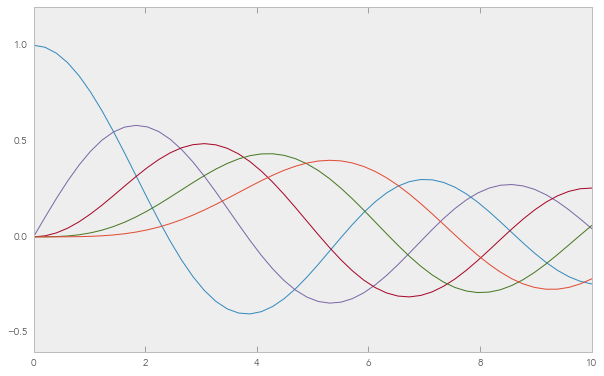

In [6]:
x = np.linspace(0, 10)
from scipy.special import jn
for n in range(5):
    plt.plot(x, jn(n, x))

## This is a notebook

*edit*

\begin{equation}
J_n (x) = \frac{1}{2 \pi} \int_{-\pi}^\pi e^{i(n \tau - x \sin(\tau))} d\tau
\end{equation}

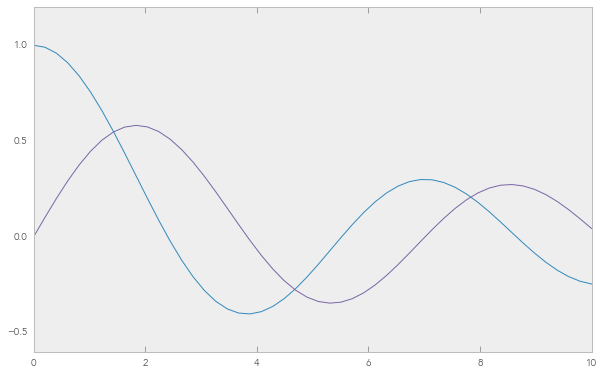

In [7]:
for n in range(2):
    plt.plot(x, jn(n, x))

# Notebooks in the classroom
## (instructor)

- Lecture notes
- Interactive presentations
- Demonstration/Illustration environment

We want to solve the Poisson equation:

\begin{align}
- \nabla^{2} u &= f \quad {\rm in} \ \Omega, \\
u &= 0 \quad {\rm on} \ \Gamma_{D}, \\
\nabla u \cdot n &= g \quad {\rm on} \ \Gamma_{N}.
\end{align}

First, we define our domain, $\Omega$, a unit square, and a function space:

In [8]:
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)
mesh

Calling FFC just-in-time (JIT) compiler, this may take some time.


Our boundary conditions:

In [9]:
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

and our source terms, $f$ and $g$:

\begin{align}
f &= 10 e^\left( - \frac { (x - 0.5)^2 + (y - 0.5) ^ 2 } { 0.02 } \right) \\
g &= \sin(5 x)
\end{align}

In [10]:
with sys_pipes():
    f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
    g = Expression("sin(5*x[0]) + %g" % eps, degree=4)

Calling DOLFIN just-in-time (JIT) compiler, this may take some time.
Calling DOLFIN just-in-time (JIT) compiler, this may take some time.


Which we can plug into the Poisson equation, where:

$$
a(u, v) = L(v) \quad \forall \ v \in V
$$

and

\begin{align}
   a(u, v) &= \int_{\Omega} \nabla u \cdot \nabla v \, {\rm d} x, \\
   L(v)    &= \int_{\Omega} f v \, {\rm d} x
            + \int_{\Gamma_{N}} g v \, {\rm d} s.
\end{align}

In [11]:
u = TrialFunction(V)
v = TestFunction(V)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

And finally compute our solution:

Calling FFC just-in-time (JIT) compiler, this may take some time.


INFO:UFL:Adjusting missing element cell to triangle.
INFO:UFL:Adjusting missing element cell to triangle.


Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


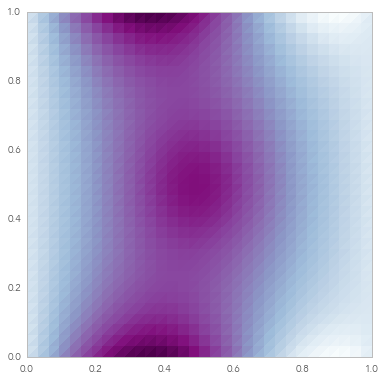

In [12]:
with sys_pipes():
    u = Function(V)
    solve(a == L, u, bc)
plot(u);

# Notebooks in the classroom
## (instructor)

- Can be prepared ahead as lecture notes
- or a live record of discussions / explorations in class

# Notebooks in the classroom
## (student)

- Follow lecture notes live, interactively
- In-class exploration (flipped classroom, [Lorena Barba](http://lorenabarba.com))
- Assignments

# Interactive widgets

help students explore principles on their own:

In [13]:
from ipywidgets import interact
from sympy import Symbol, Eq, factor

@interact
def factorit(n=5):
    x = Symbol('x')
    return Eq(x**n-1, factor(x**n-1))

 5               ⎛ 4    3    2        ⎞
x  - 1 = (x - 1)⋅⎝x  + x  + x  + x + 1⎠

<!-- (*excerpt from Lorena Barba's AeroPython notebooks*) /!-->


...In Cartesian coordinates, the stream function is given by:

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$

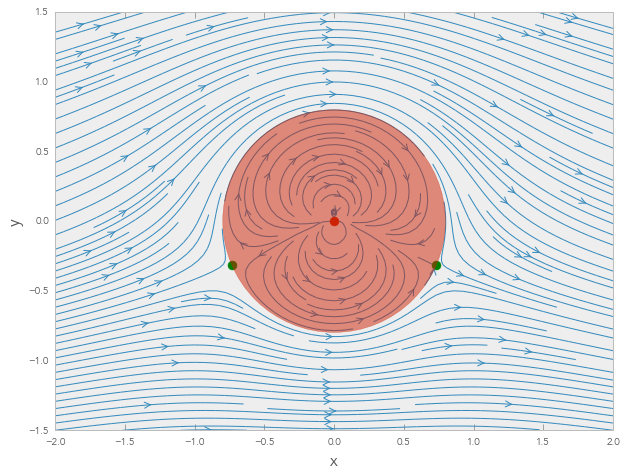

In [14]:
interact(plot_cylinder_lift, gamma=(0, 10));

# Notebooks as assignments

- Distribute skeleton for students to fill out
- Quick feedback loop while working
- Returned assignemnts include output
- Can include prose results

> Interpolation is a method of constructing new data points within the range of a discrete set of known data points.

[wikipedia](https://en.wikipedia.org/wiki/Interpolation)

In [15]:
def interpolate(x, x0, x1, y0, y1):
    """return an interpolated value for y(x)
    
    based on:
    - y(x0) = y0
    - y(x1) = y1
    """
    # Student code here:

In [16]:
def test_interpolate():
    f = math.sin
    x0, x1 = 1, 2
    y0, y1 = f(x0), f(x1)
    y = interpolate(x0, x0, x1, y0, y1)
    assert y == x0
    '...'

# NBGrader

- Tools for notebooks as assignments
- Building instructor/student versions of notebooks
- Distributing assignments to students
- Auto-grading of assignments with tests
- Form for manual grading, prose answers, comments
- Builds grade reports to return to students

# NBGrader

<img src="nbgrader.gif">

# JupyterHub

<img src="jupyterhub.png" class="img-right">

- Notebook server for each student
- Manage users with GitHub, campus, or any other authentication
- Control user execution environment with Docker, etc.
- Zero installation for students
- nbgrader integration

In [17]:
%%html
<center><iframe src="https://demohub.jupyter.org" width=800 height=600/></center>

# SageMathCloud

- Provides *hosted* computing, including notebooks
- Including classroom-focused features
- Live collaboration on notebooks
- Commercial support

# Summary

## <br>
## Lots of ways to use notebooks in teaching

- interactive lecture notes with maths, code (not limited to Python!)
- in-class computational exercises
- homework assignments
- nbgrader helps with building/distributing/grading assignments
- JupyterHub for managing execution for a class
- SageMathCloud for paid hosting, collaboration